In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
## Lets check for data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
## Lets check some summary stats but also convert total_charges into numeric

In [8]:
df['TotalCharges'] = df['TotalCharges'].replace({' ':np.nan})

In [9]:
df['TotalCharges'] = df['TotalCharges'].astype('float') ## Convert to float because these are numeric values not string

In [10]:
import missingno as ms

<Axes: >

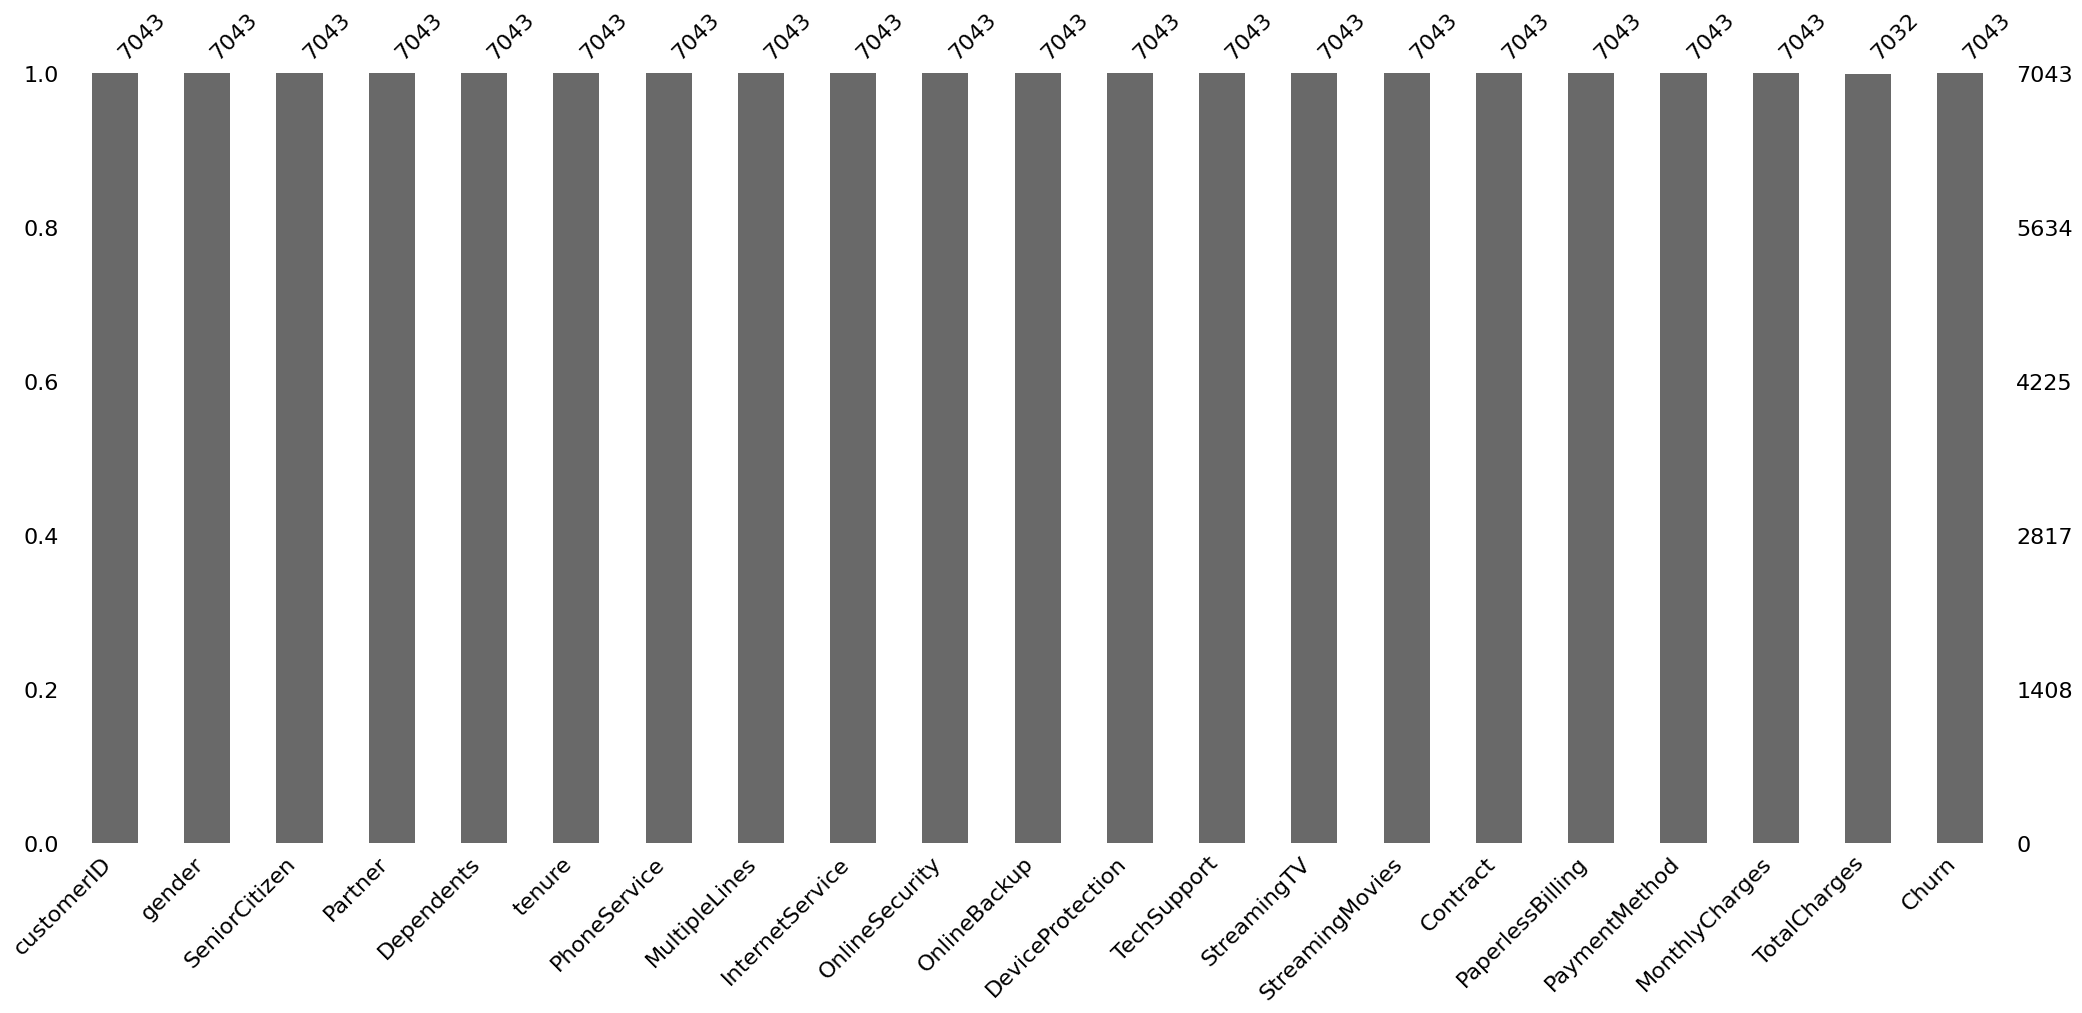

In [11]:
ms.bar(df)

In [12]:
## Some missing values now are present in totalcharges so lets fill them

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
## Before filling lets check its distribution

<Axes: xlabel='TotalCharges', ylabel='Count'>

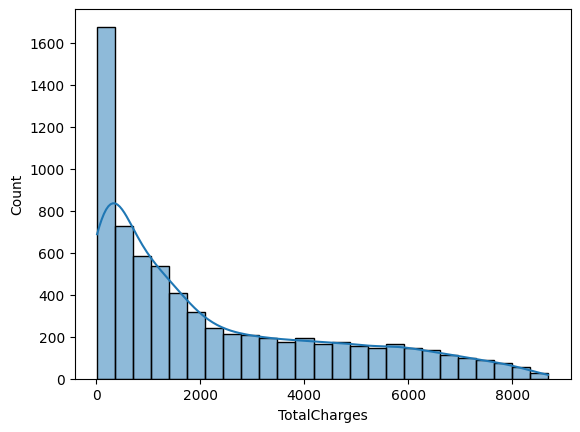

In [15]:
sns.histplot(df['TotalCharges'], kde=True)  

In [16]:
df['TotalCharges'].skew()             ## Slightly skewed to right so lets use median because not too high number of missing values

0.961642499724251

In [17]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

<Axes: >

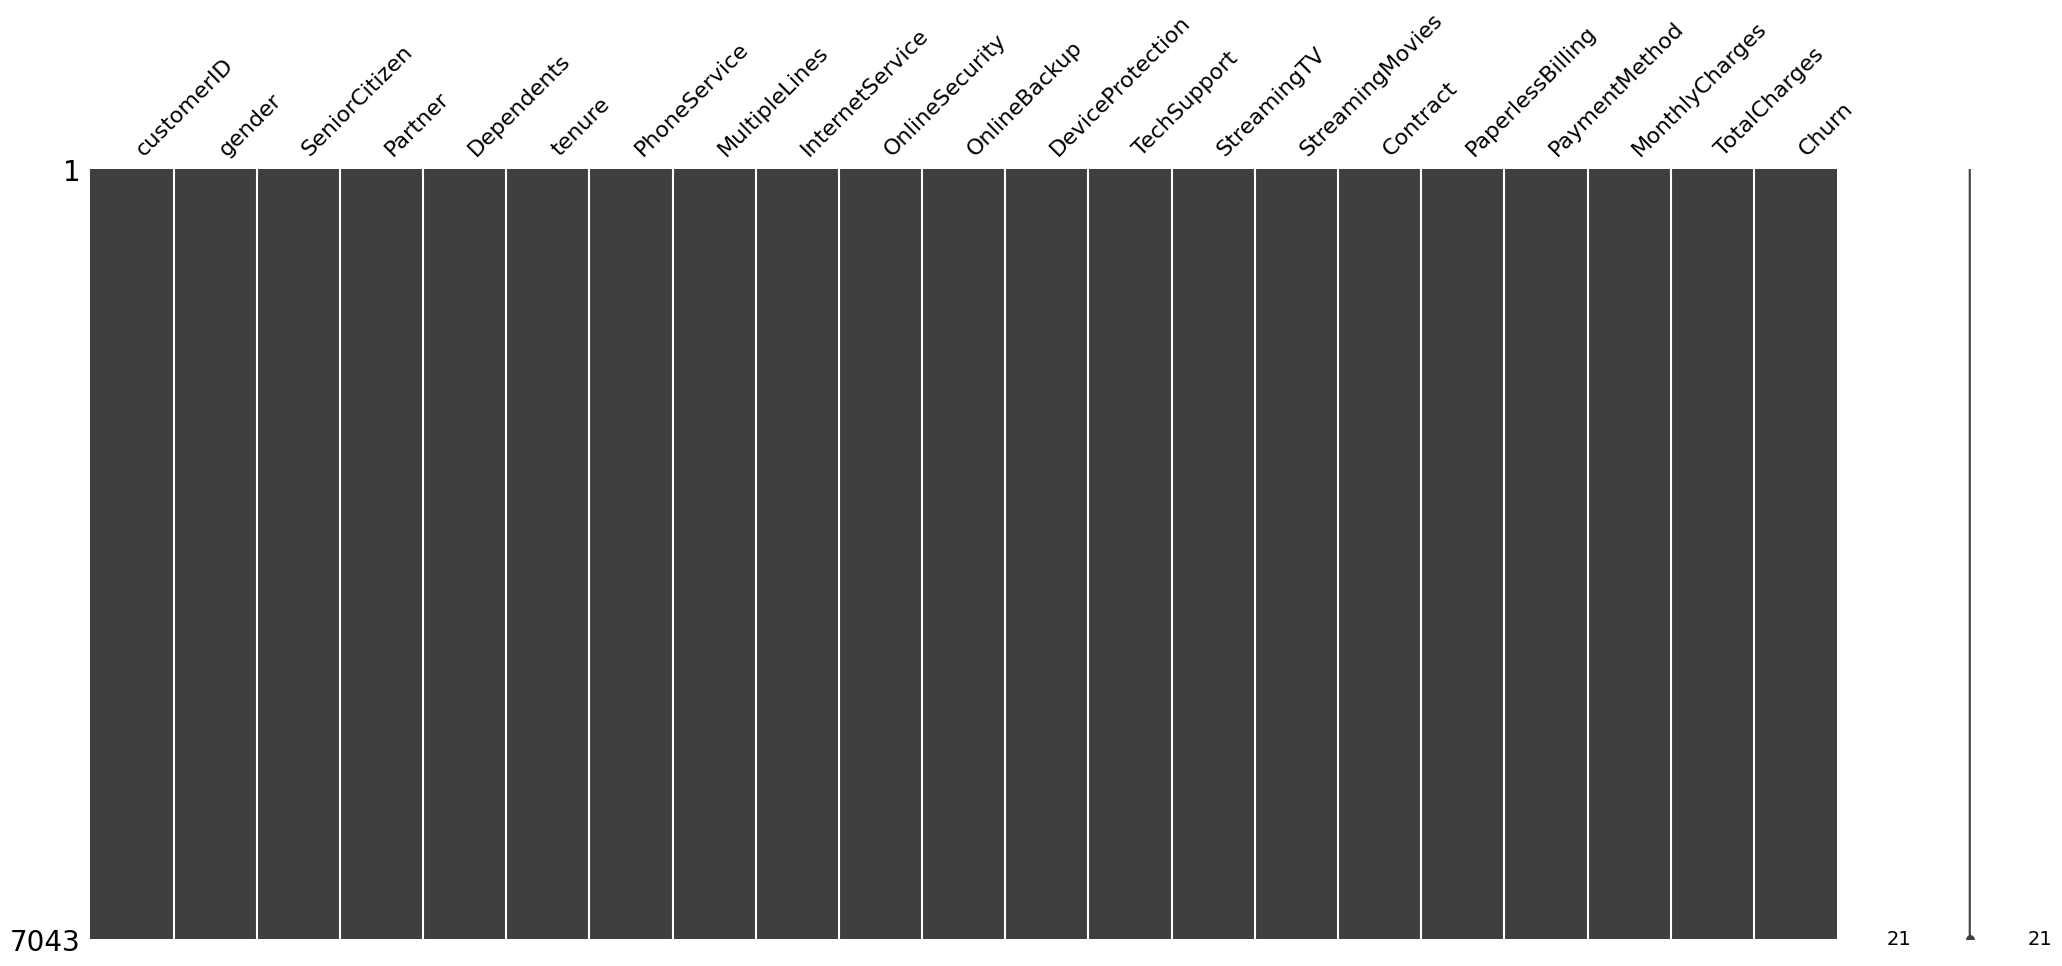

In [18]:
ms.matrix(df)

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Things done so far

In [21]:
## Explored dataset ,shape, info, and some stats
## handle inconsistent dtype of total_charges and then fill missing values with median because of some skewness
## again plot matrix from missingno to check for missing values
## first i think that min 0 value for tenure is not good but it can reflect new customer so tenure is 0, other all is clear

In [22]:
df['Churn'].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [23]:
## So, the dataset is highly imbalanced as there are 26% customers are churner 

In [24]:
## Lets drop Customerid column as it is not useful for analysis because completely unique for each

In [25]:
df.drop('customerID',axis=1, inplace=True)

## Lets analyze each variable here using plots

In [27]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
## Lets fetch binary columns first and analyze them with barplot and pie chart

In [29]:
binary_cols = [col for col in df.select_dtypes(include='object').columns if (df[col].nunique() < 3) & (col !='Churn')]

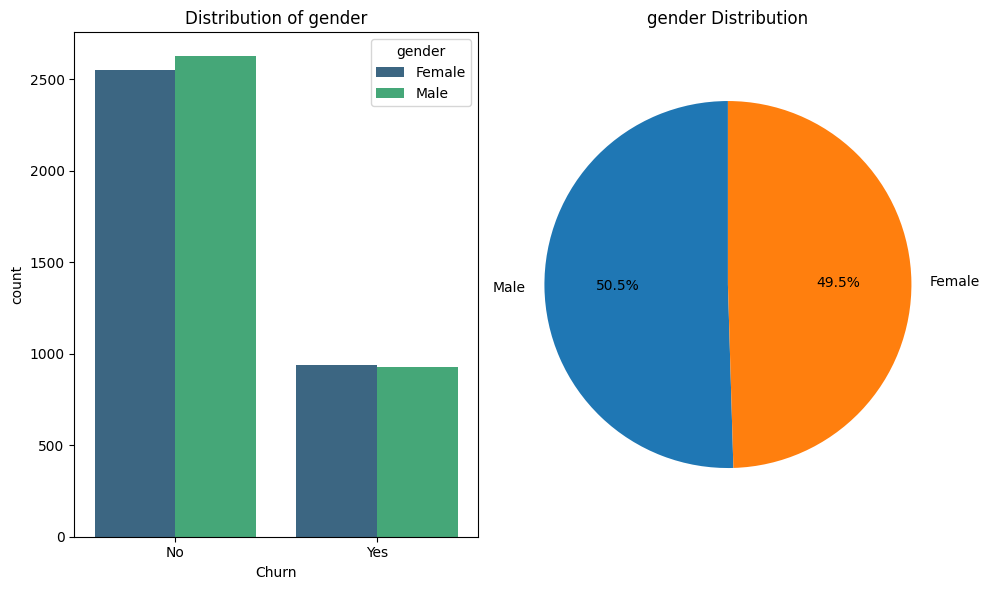

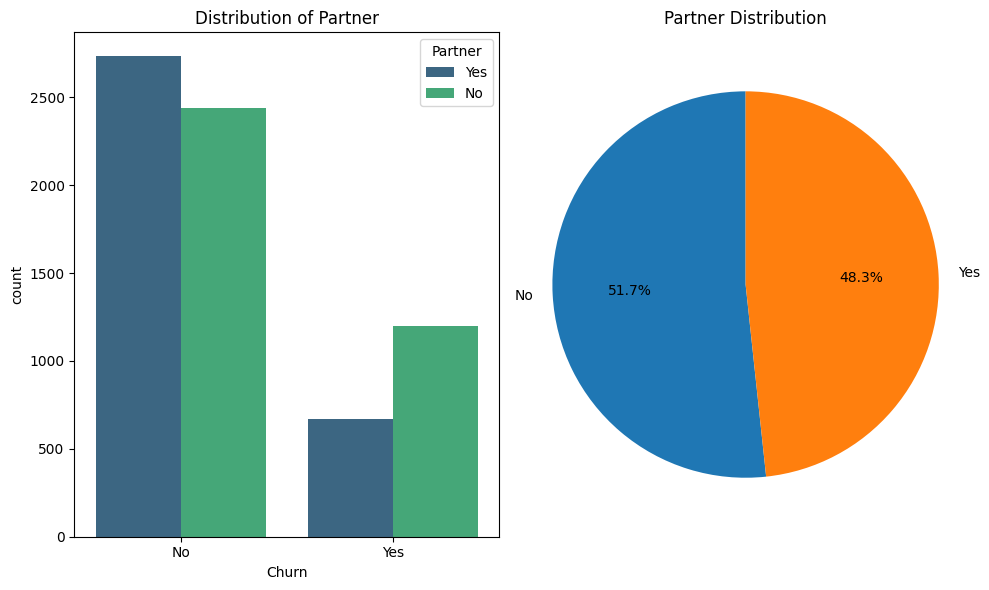

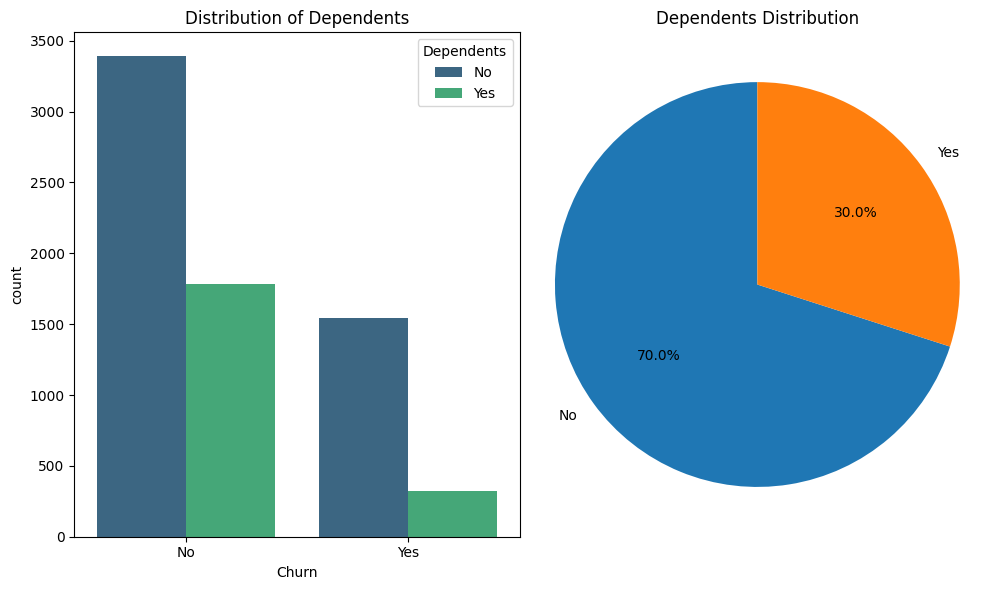

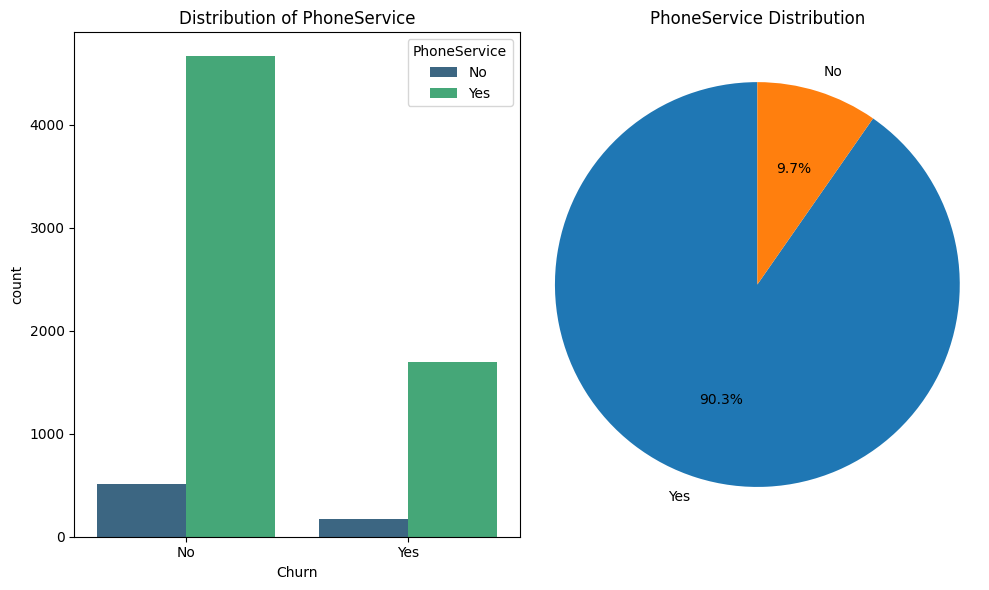

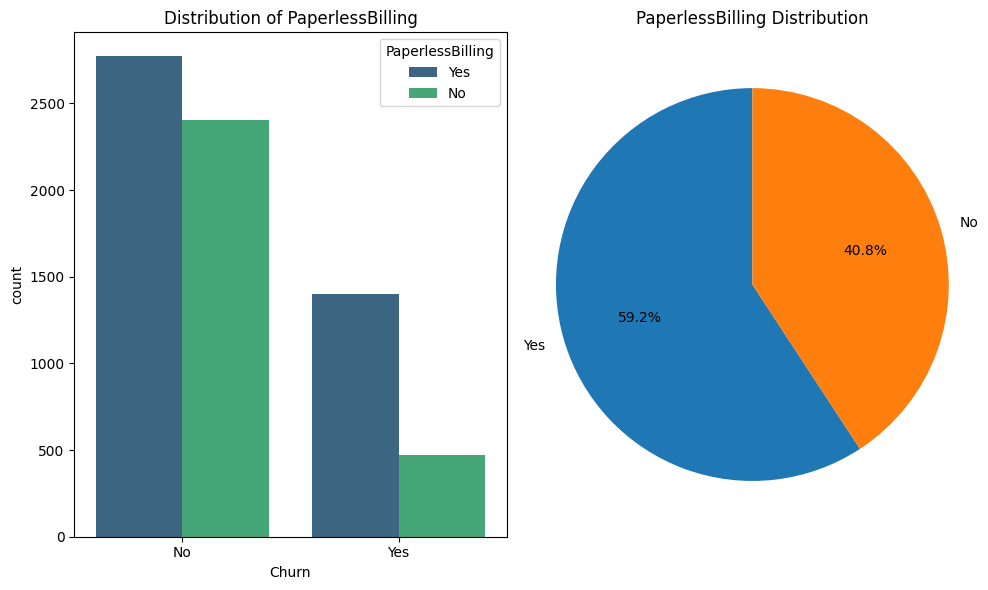

In [30]:
for col in binary_cols:
    plt.figure(figsize=(10,6))
    plt.subplot(121)
    sns.countplot(x='Churn', hue=df[col], palette='viridis',data=df)
    plt.title(f"Distribution of {col}")
    plt.subplot(122)
    values = df[col].value_counts()
    plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"{col} Distribution")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [31]:
## there is equal balance in churn and not churn for both genders
## And data contains almost equal amount of males and females
## the person who is single and doesn't has partner tend to churn more as compared to a person with partner , and it obvious that the customer with
## partner has to take care of partner and can't churn without any critical reason
## Almost balance amount of persons who has partner and not
## The persons which are not dependant they tend to churn more, there is balance also that most of non-depandant persons are also not churn but 
## data contains 70% of persons who are not depandant
## Almost 90% of people have phone service but the customers with phone service are also not churning but more then 1500 customers are also churn even
## when have phone service , may be the quality issue or any other , but needs more analysis
## in Paperless billing the persons even with paperless billing are tend to churn more as compared to persons with paper billing but we will confirm why
## with more analysis 

In [32]:
other_cats_cols = [col for col in df.select_dtypes(include='object') if (col not in binary_cols) & (col != 'Churn')]

In [33]:
other_cats_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [34]:
## Lets visualize them as well by churn 

Values Percentage: MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64


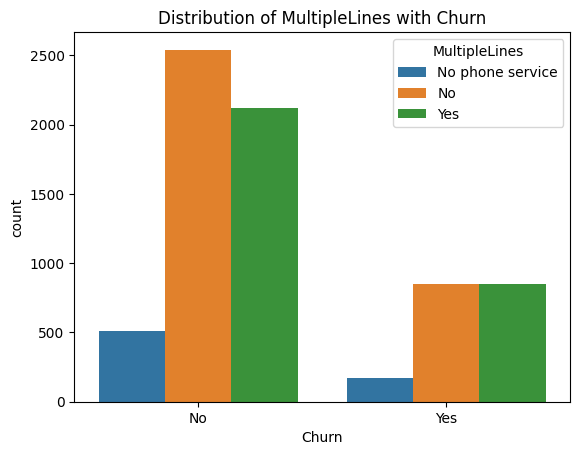

Values Percentage: InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64


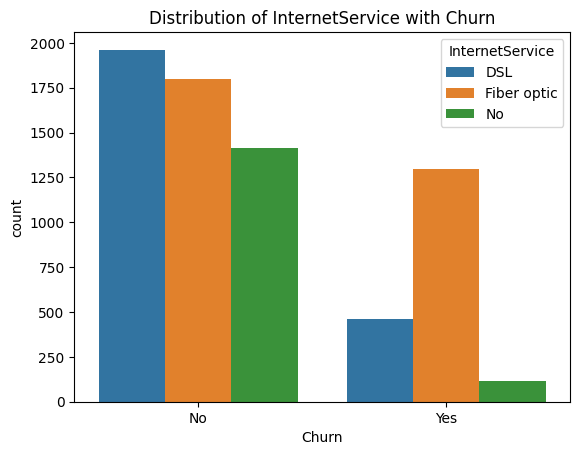

Values Percentage: OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: proportion, dtype: float64


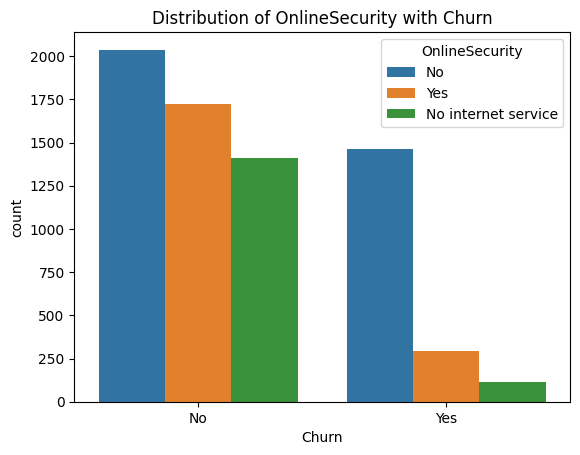

Values Percentage: OnlineBackup
No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: proportion, dtype: float64


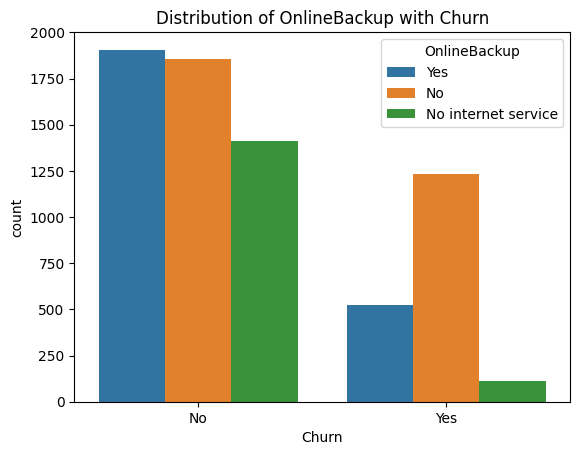

Values Percentage: DeviceProtection
No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: proportion, dtype: float64


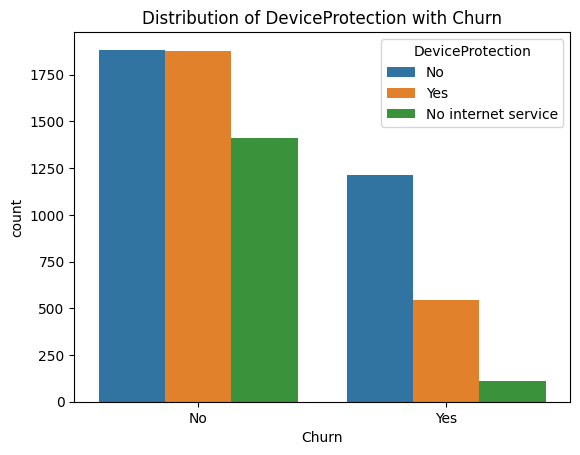

Values Percentage: TechSupport
No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: proportion, dtype: float64


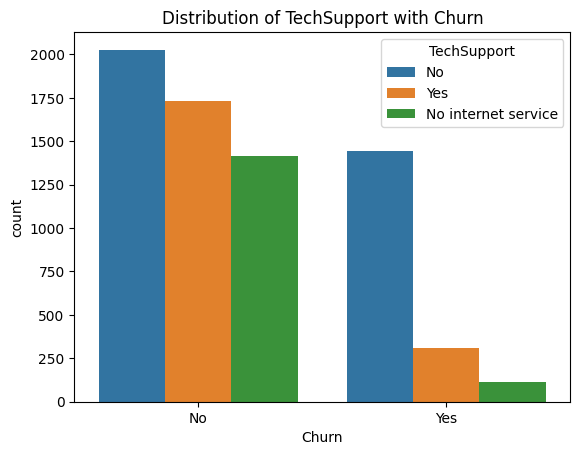

Values Percentage: StreamingTV
No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: proportion, dtype: float64


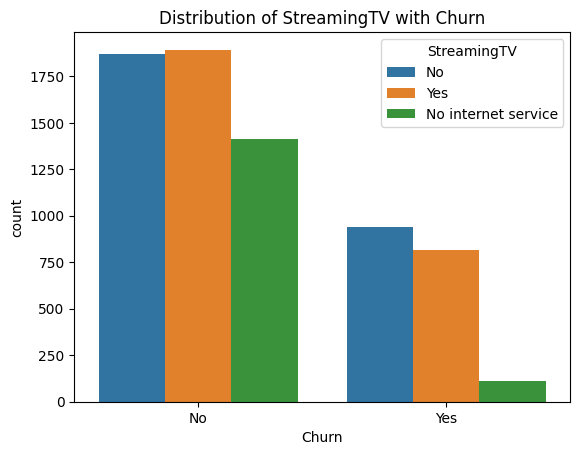

Values Percentage: StreamingMovies
No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: proportion, dtype: float64


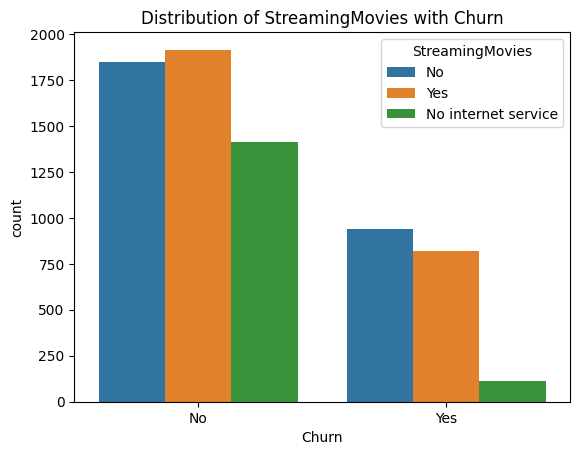

Values Percentage: Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: proportion, dtype: float64


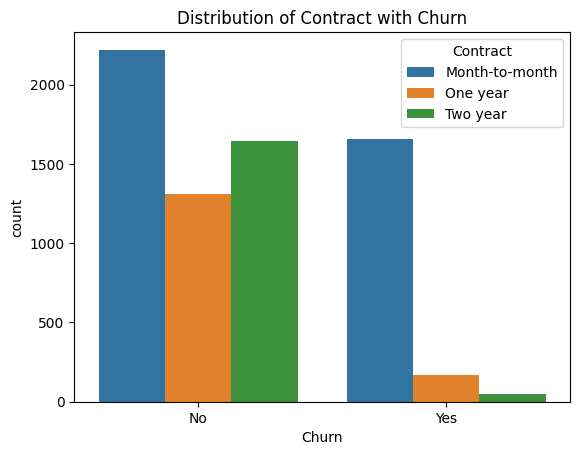

Values Percentage: PaymentMethod
Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: proportion, dtype: float64


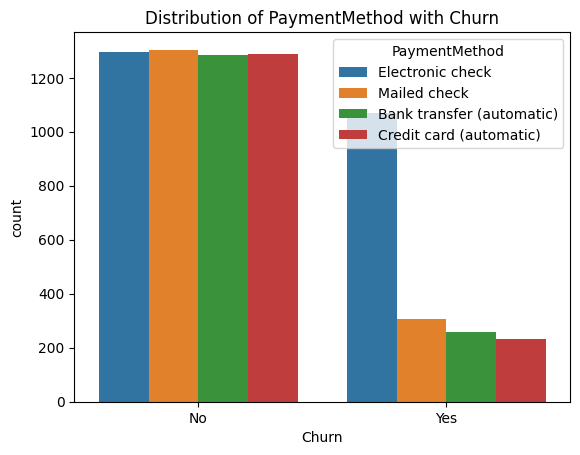

In [35]:
for col in other_cats_cols:
    sns.countplot(data=df, x='Churn', hue=df[col])
    plt.title(f"Distribution of {col} with Churn")
    print(f"Values Percentage: {df[col].value_counts(normalize=True)*100}")
    plt.show()

In [36]:
## so, in multiple lines there are many customer which don't have multiple lines service, but still there are many with this service as well.
## The amount of churner is equal here , now the thing is that why persons with multiple lines are churning, this may be due to poor quality of high 
## of multiple lines

In [37]:
## In internet Service , there are many peoples with DSL service, and then Fiber Optic and then 1200 plus with no internet service at all.
## The people with Fiber optic service are churning more and it may be due to high price or service issues.
## Customers with no online security at all are churning more and it clear that they are not getting benefit of online security.
## Customer with no online backup are churning more because they don't have benefit of online backup
## Customer with no device protection at all are churning more and it is bad.
## Same here, Customers with no tech support are churning more because may be there interest becomes low due to no tech support.
## Almost balanced amount of churners wwith streaming tv service and not having this service, but still customers with no support for this service
## are churning more
## Exactly same here in streaming movies as well, because these are fun and entertainment related services and might effect churners.
## The people with month-to-month contract are churning more because these are not long-term customers and maybe they are not engaged or satisfied with
## company.
## High number of customers are churning with electronic payment method and it is disadvantage because today, it is very common to give benefits of 
## credit card and other easy and digital methods for payment not electronic.

In [38]:
numeric_features = [col for col in df.select_dtypes(include='number') if (col !='SeniorCitizen')]
numeric_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [39]:
## Lets also analyze SeniorCitizen col because it is missed before, it is already in numeric form

Values Percentage: SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64


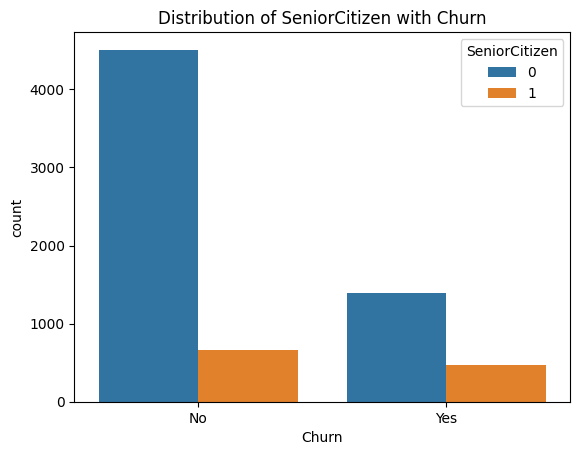

In [40]:
sns.countplot(data=df, x='Churn', hue=df['SeniorCitizen'])
plt.title("Distribution of SeniorCitizen with Churn")
print(f"Values Percentage: {df['SeniorCitizen'].value_counts(normalize=True)*100}")
plt.show()

In [41]:
## The senior citizens are churning more then non-senior , maybe due to less rescources or services 

In [42]:
## Lets analyze the distribution of numeric features and boxplot to detect outliers and other stats

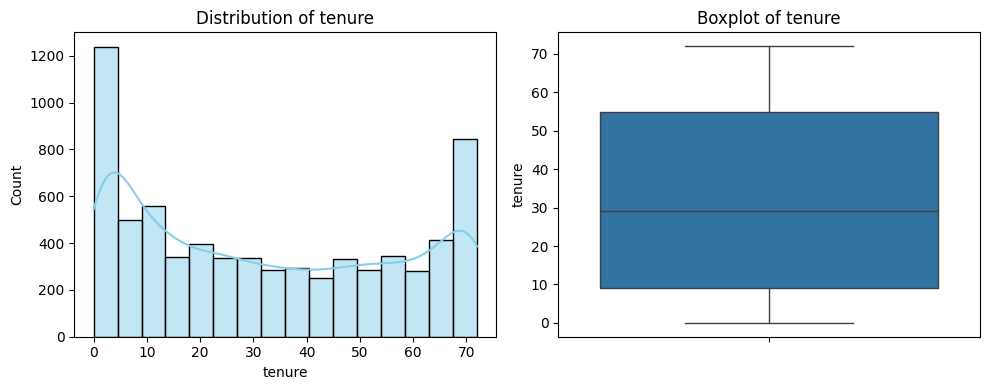

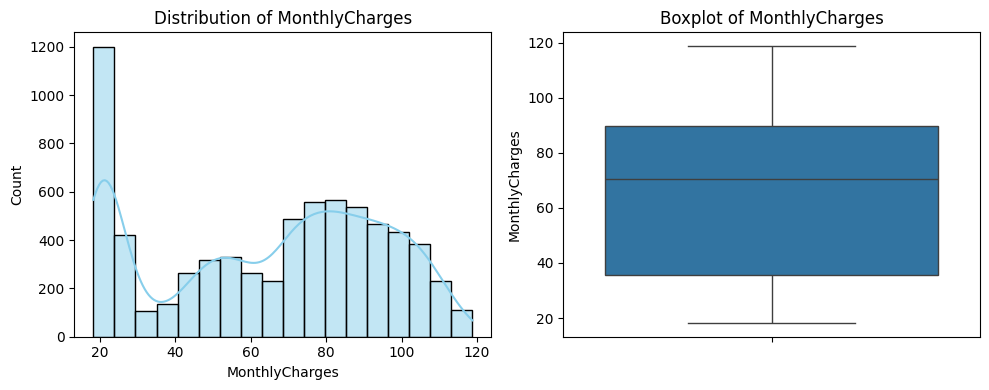

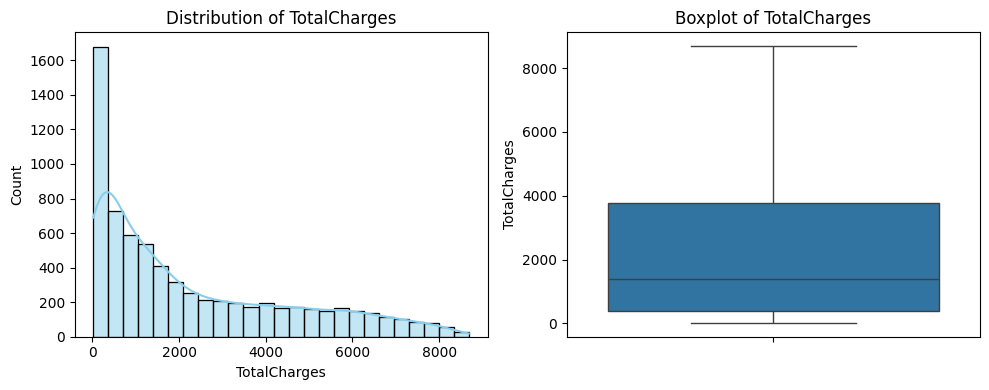

In [43]:
for col in numeric_features:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.histplot(df[col], color='skyblue',kde=True)
    plt.title(f"Distribution of {col}")
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [44]:
## mostly customers have very short tenure near to 0 and some has very high tenure near to 70, fewer customer in the range of 10 to 60.
## Many customers churn early and some are very loyal
## Median is around 30 and there is outlier present in tenure
## Most of the customers have monthly charges around 20 and then there is small high peak aroung 70 to 100 , others has less monthly charges and
## some has high charges above then 100.
## Median is around 70 and their is no outlier here as well and it is a good thing.
## Many customers have very low totalcharges and mainly around 0 and then the peak is descreasing and data is right skewed due to high peak in left
## But no outlier is available here and median is around 1500.

In [45]:
## Let me create a new feature with grouping tenure into 3 groups

In [46]:
def tenure_group(t):
    if t <= 6: return 'Short'
    elif t <= 24: return 'Mid'
    else: 
        return 'Long'

df['TenureGroup'] = df['tenure'].apply(tenure_group)

In [47]:
## Visualize it

<Axes: xlabel='count', ylabel='TenureGroup'>

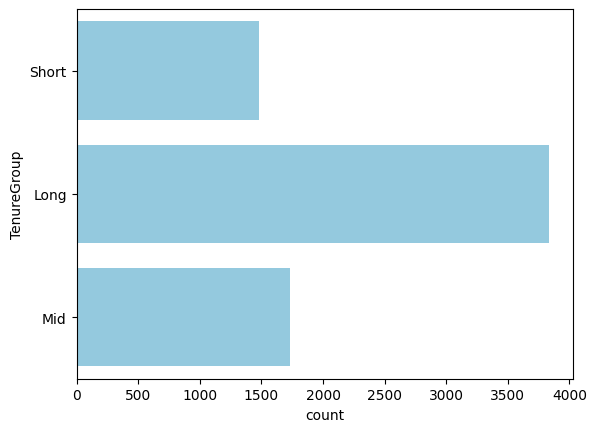

In [48]:
sns.countplot(df['TenureGroup'],color='skyblue')

In [49]:
## So, most of the customers are loyal and with tenure above then 24 months , it means there are less number of persons who will churned in terms of
## tenure but still further analysis might help

In [50]:
### Lets plot Churn rate By contract type to analyze churners by contract type.

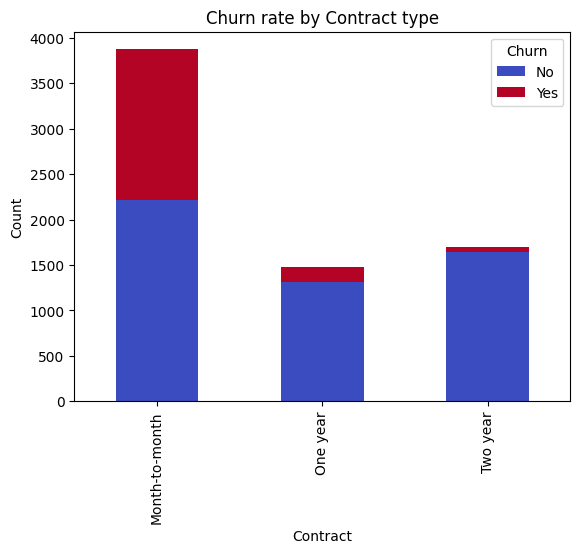

In [51]:
contract_churn = df.groupby('Contract')['Churn'].value_counts().unstack()
contract_churn.plot(kind='bar', stacked=True, colormap = 'coolwarm')
plt.title("Churn rate by Contract type")
plt.ylabel("Count")
plt.show()

In [52]:
## So, here is balance amount of persons in month-to-month but still many persons are leaving in this contract , maybe due to 
## dissatisfaction, or low engagement and no interest

Text(0.5, 1.0, 'Numeric Features Correlation')

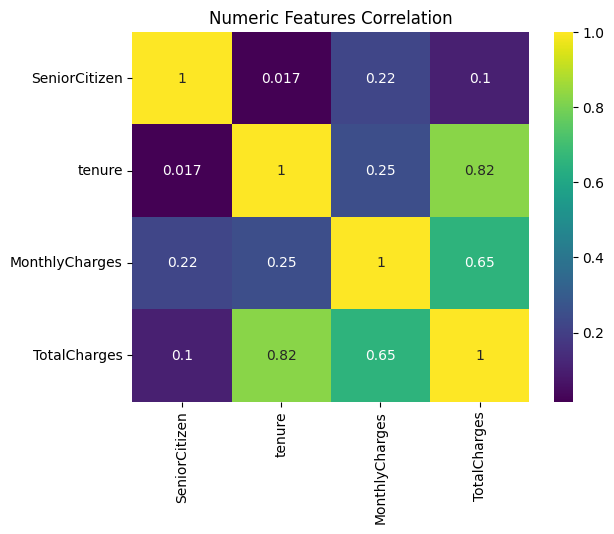

In [53]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title("Numeric Features Correlation")

In [54]:
## There is very high correlation between tenure and totalcharges and between monthly charges and total charges
## But the correlation between tenure and total charges is very high and can cause multicollinearity but still i will  use VIF next to detect it further

Text(0, 0.5, 'Count')

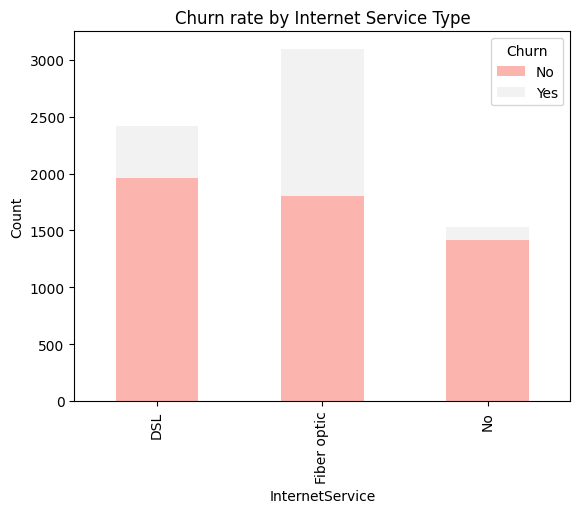

In [55]:
internet_churn = df.groupby('InternetService')['Churn'].value_counts().unstack()
internet_churn.plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title("Churn rate by Internet Service Type")
plt.ylabel("Count")

In [56]:
## Mostly customers with Fiber Optic as Internet service are churning more , may be due to high prices or any issues .

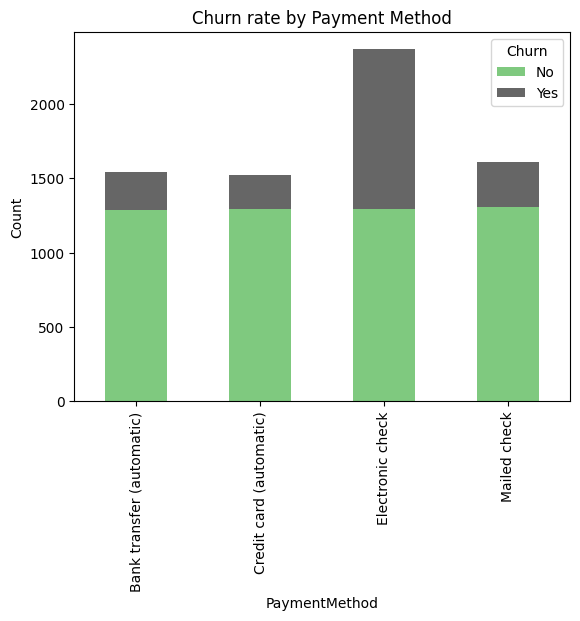

In [57]:
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts().unstack()
payment_churn.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Churn rate by Payment Method")
plt.ylabel("Count")
plt.show()

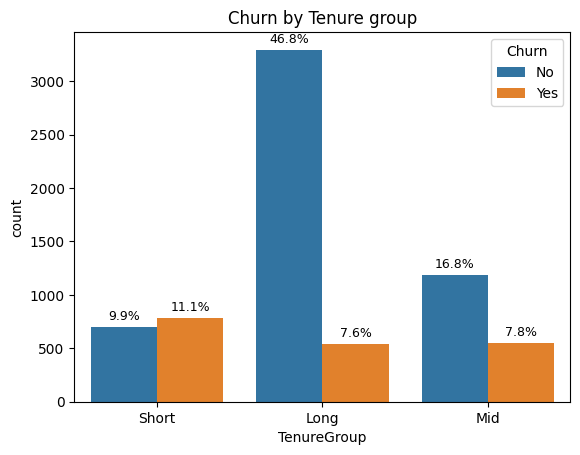

In [58]:
ax = sns.countplot(x='TenureGroup', hue='Churn', data=df)
ax.set_title('Churn by Tenure group')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        percentage = 100 * height / total
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', 
                    xytext=(0, 3), textcoords='offset points')

plt.show()

In [59]:
# The chart shows that churn is highest in the Short tenure group (11.1%) and lowest in the Long tenure group (7.6%). Customers with 
# longer tenure are more likely to stay, aligning with the earlier tenure-related charts.

In [60]:
pd.crosstab(df['Contract'], df['PaymentMethod'], values=(df['Churn'] == 'Yes'), aggfunc='mean')

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Contract,,,,
Month-to-month,0.341256,0.327808,0.537297,0.315789
One year,0.097187,0.103015,0.184438,0.068249
Two year,0.033688,0.022375,0.077381,0.007853


In [61]:
## Mostly churned people with one-year contract are using bank transfer for payment method, Month-to-month user are churning equally but mostly who 
## are using electronic check

In [62]:
## Lets analyze this Do short contracts really result in low loyalty?

<Axes: xlabel='Contract', ylabel='tenure'>

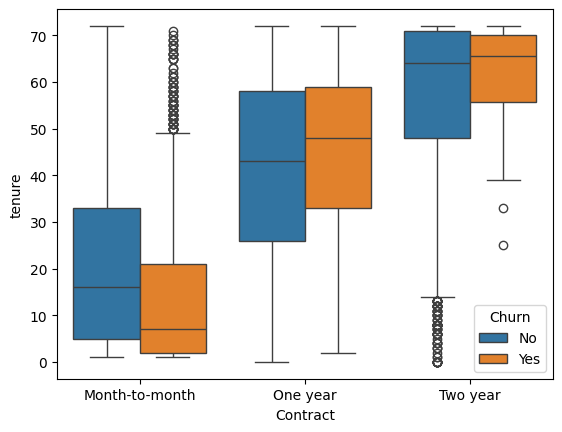

In [63]:
sns.boxplot(x=df['Contract'], y=df['tenure'], hue=df['Churn'])

In [64]:
## Customers who did not churn have a median tenure around 20-25 months, while those who churned (have a median tenure 
## around 10-15 months. The range for non-churned customers is wider, extending up to around 60 months.
## in one year Non-churned customers have a median tenure around 35-40 months, while churned customers have a median around 45-50 
## months. Both groups show a similar spread, with some outliers.
## in two year contract Non-churned customers have a median tenure around 60-65 months, while churned customers are minimal, 
## with only a few outliers around 20-35 months.

In [65]:
## lets analyze Do digital users churn more???

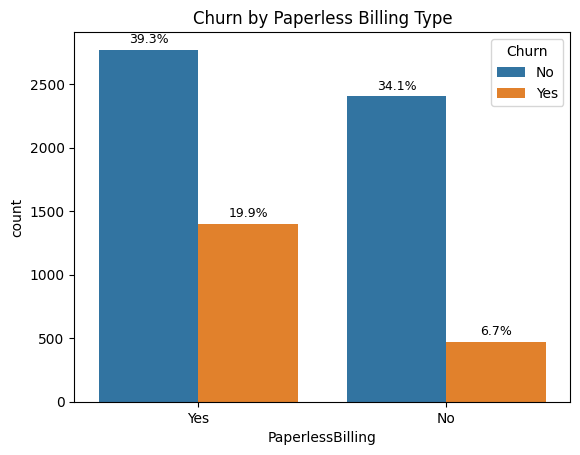

In [66]:
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
ax.set_title('Churn by Paperless Billing Type')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        percentage = 100 * height / total
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', 
                    xytext=(0, 3), textcoords='offset points')

plt.show()

In [67]:
## Customers with paperless billing have a higher churn rate (19.9%) compared to those 
## without (6.7%), suggesting paperless billing may be associated with increased churn.

In [68]:
## Lets identify Are we serving seniors effectively???

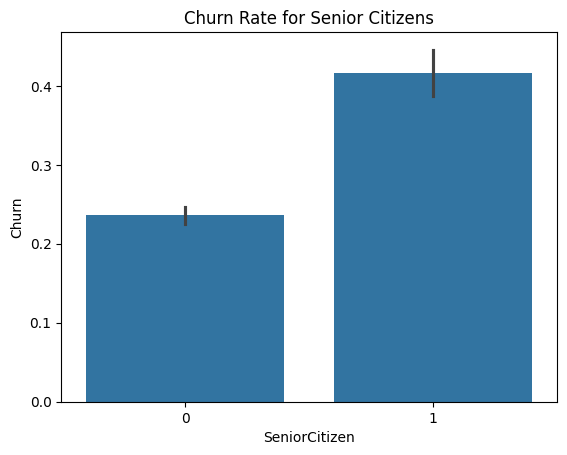

In [69]:
sns.barplot(x=df['SeniorCitizen'], y=(df['Churn'] == 'Yes').astype(int))
plt.title('Churn Rate for Senior Citizens')
plt.show()

In [70]:
## Non-senior citizens have a churn rate of approximately 0.25.
## Senior citizens have a higher churn rate of approximately 0.4.

In [71]:
## Lets bundle streaming features to identify (Are content bundle users more likely to leave?)

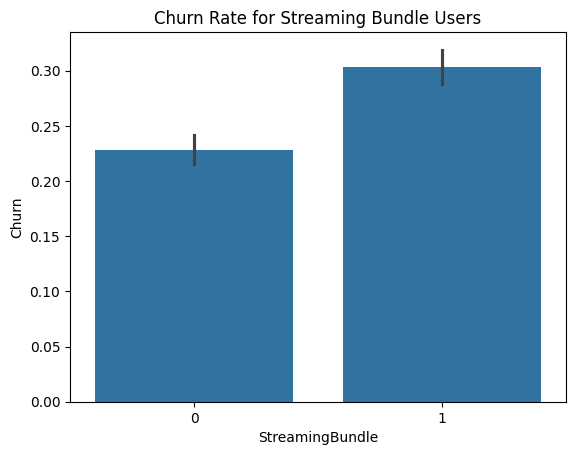

In [72]:
df['StreamingBundle'] = ((df['StreamingTV'] == 'Yes') | (df['StreamingMovies'] == 'Yes')).astype(int)
sns.barplot(x=df['StreamingBundle'], y=(df['Churn'] == 'Yes').astype(int))
plt.title('Churn Rate for Streaming Bundle Users')
plt.show()

In [73]:
# with no streaming bundle Churn rate is around 0.22.
# With streaming bundle Churn rate is higher, around 0.28.
# Customers with a streaming bundle have a slightly higher churn rate, suggesting that the bundle may not effectively retain users.

In [74]:
## Lets create another feature to identify (Is bundling working?)

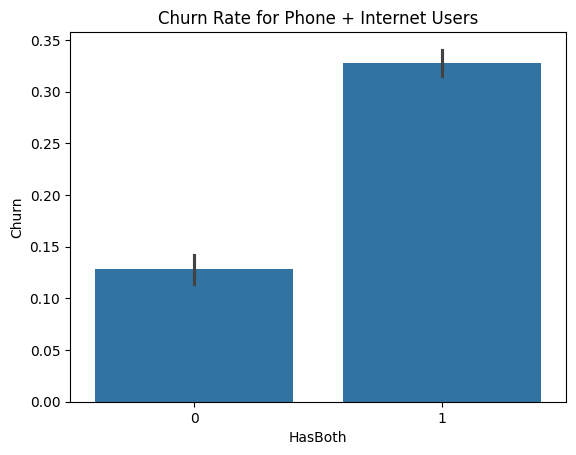

In [75]:
df['HasBoth'] = ((df['PhoneService'] == 'Yes') & (df['InternetService'] != 'No')).astype(int)
sns.barplot(x=df['HasBoth'], y=(df['Churn'] == 'Yes').astype(int))
plt.title('Churn Rate for Phone + Internet Users')
plt.show()

In [76]:
## Customers with both phone and internet services have a much higher churn rate, indicating that 
## bundling these services may not effectively retain customers.

In [77]:
## Lets create bins of tenure to identify (Are customers leaving in their first months?)

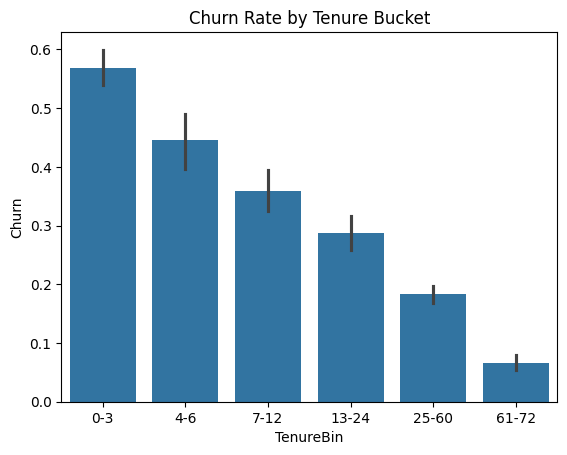

In [78]:
df['TenureBin'] = pd.cut(df['tenure'], bins=[0, 3, 6, 12, 24, 60, 72], labels=['0-3', '4-6', '7-12', '13-24', '25-60', '61-72'])
sns.barplot(x=df['TenureBin'], y=(df['Churn'] == 'Yes').astype(int))
plt.title('Churn Rate by Tenure Bucket')
plt.show()

In [79]:
## Churn rate decreases as tenure increases, with the highest churn occurring in the first 3 months and the lowest in the 61-72 month range.

In [80]:
## Lets analyze (Is auto-payment working to reduce churn?)

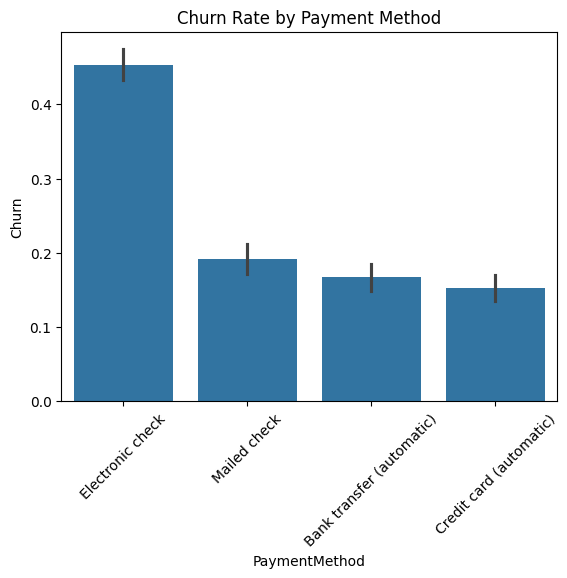

In [81]:
sns.barplot(x=df['PaymentMethod'], y=(df['Churn'] == 'Yes').astype(int))
plt.xticks(rotation=45)
plt.title('Churn Rate by Payment Method')
plt.show()

In [82]:
## Customers using electronic checks have the highest churn rate, while those using credit 
## card have the lowest, suggesting automatic payment methods may improve retention.

In [83]:
## Lets create another feature to identify (Are customers who have internet but no tech support churning more?)

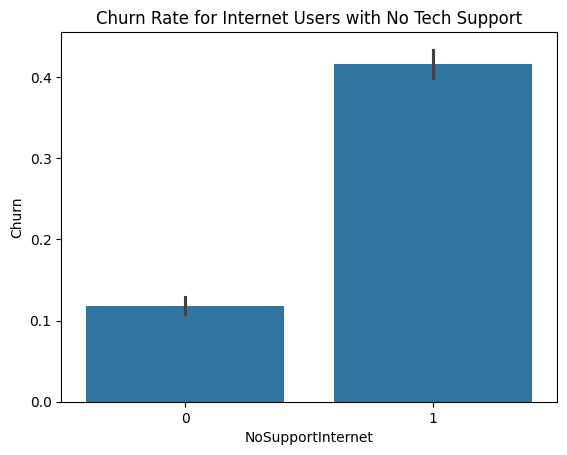

In [84]:
df['NoSupportInternet'] = ((df['InternetService'] != 'No') & (df['TechSupport'] == 'No')).astype(int)
sns.barplot(x=df['NoSupportInternet'], y=(df['Churn'] == 'Yes').astype(int))
plt.title('Churn Rate for Internet Users with No Tech Support')
plt.show()

In [85]:
## Lets create bins of total charges as well to analyze Are long-time customers still churning despite investment???

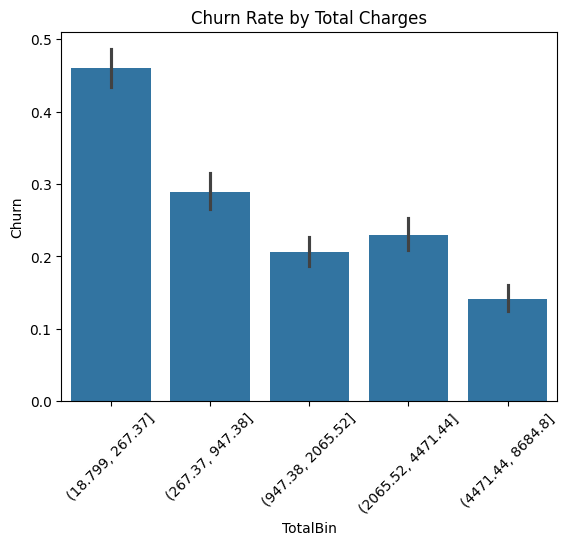

In [86]:
df['TotalBin'] = pd.qcut(df['TotalCharges'], 5)
sns.barplot(x=df['TotalBin'], y=(df['Churn'] == 'Yes').astype(int))
plt.title('Churn Rate by Total Charges')
plt.xticks(rotation=45)
plt.show()

In [87]:
## Churn rate decreases as total charges increase, with the highest churn in the 
## lowest charge bin and the lowest churn in the highest charge bin.

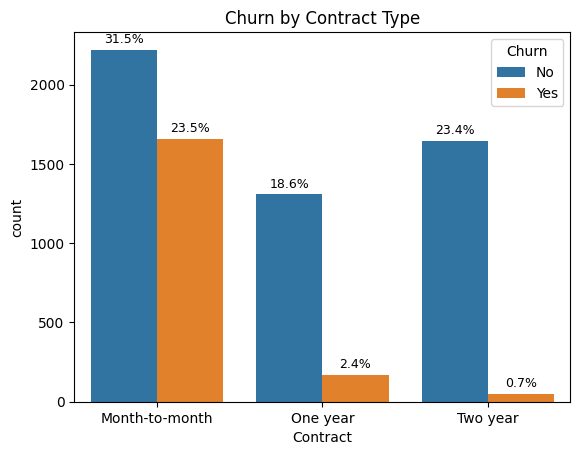

In [88]:
ax = sns.countplot(x='Contract', hue='Churn', data=df)
ax.set_title('Churn by Contract Type')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        percentage = 100 * height / total
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', 
                    xytext=(0, 3), textcoords='offset points')

plt.show()

In [89]:
## just added percentage labels for better view and understanding

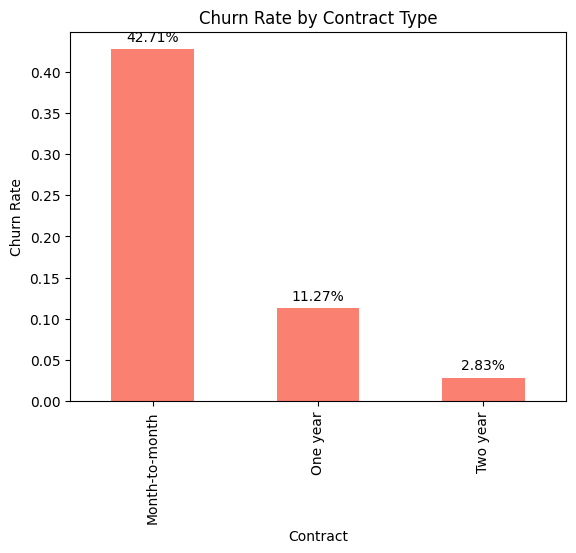

In [90]:
churn_rate = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()['Yes'].sort_values(ascending=False)
top3 = churn_rate.head(3)
ax = churn_rate.plot(kind='bar', color=['salmon' if x in top3.values else 'lightblue' for x in churn_rate])
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
for idx, value in enumerate(churn_rate):
    plt.text(idx, value + 0.01, f"{value:.2%}", ha='center')

In [91]:
## The churn rate decreases significantly with longer contract terms, with the highest churn occurring in month-to-month contracts.

In [92]:
print(binary_cols)
print(other_cats_cols)
print(numeric_features)
df.columns

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
['tenure', 'MonthlyCharges', 'TotalCharges']


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TenureGroup',
       'StreamingBundle', 'HasBoth', 'TenureBin', 'NoSupportInternet',
       'TotalBin'],
      dtype='object')

In [93]:
engineered_features = [
    'TenureGroup',
    'StreamingBundle', 
    'HasBoth',           
    'TenureBin',        
    'NoSupportInternet',  
    'TotalBin'           
]

In [94]:
df[engineered_features].dtypes

TenureGroup            object
StreamingBundle         int32
HasBoth                 int32
TenureBin            category
NoSupportInternet       int32
TotalBin             category
dtype: object

In [96]:
ordinal_like_features = ['TenureGroup', 'TenureBin', 'TotalBin']

In [97]:
engineered_cats = ['StreamingBundle', 'HasBoth', 'NoSupportInternet']

In [98]:
for col in binary_cols + other_cats_cols + ordinal_like_features + engineered_cats:
    df[col] = df[col].astype('category')

In [99]:
tenure_group_order = {'Short': 0, 'Mid': 1, 'Long': 2}
df['TenureGroup'] = df['TenureGroup'].map(tenure_group_order).astype('category')

In [100]:
tenure_bin_order = {
    '0-3': 0, '4-10': 1, '11-20': 2, '21-30': 3, '31-40': 4,
    '41-50': 5, '51-60': 6, '61-72': 7
}
df['TenureBin'] = df['TenureBin'].map(tenure_bin_order).astype('category')

In [101]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [102]:
print(df.dtypes)

gender               category
SeniorCitizen        category
Partner              category
Dependents           category
tenure                  int64
PhoneService         category
MultipleLines        category
InternetService      category
OnlineSecurity       category
OnlineBackup         category
DeviceProtection     category
TechSupport          category
StreamingTV          category
StreamingMovies      category
Contract             category
PaperlessBilling     category
PaymentMethod        category
MonthlyCharges        float64
TotalCharges          float64
Churn                   int64
TenureGroup          category
StreamingBundle      category
HasBoth              category
TenureBin            category
NoSupportInternet    category
TotalBin             category
dtype: object


In [119]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [683]:
## Lets create new features to check whether they increase model performance

In [219]:
df['CostTenureRatio'] = df['MonthlyCharges'] / (df['tenure'] + 1)

In [243]:
df['ContractTenure'] = df['Contract'].astype(str) + '_' + pd.cut(df['tenure'], bins=[0, 3, 12, 36, 72], labels=['new', 'short', 'mid', 'long']).astype(str)
df['ContractTenure'] = df['ContractTenure'].astype('category')

In [279]:
df['EarlyHighCost'] = ((df['MonthlyCharges'] > df['MonthlyCharges'].quantile(0.75)) & (df['tenure'] < 6)).astype(int)

In [319]:
service_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['MissingServicesCount'] = df[service_cols].eq('No').sum(axis=1)

In [361]:
df['MonthlyCostZ'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean()) / df['MonthlyCharges'].std()
df['MonthlyCostZ_Risk'] = (df['MonthlyCostZ'] > 1.5).astype(int)

In [685]:
## Lets use kmeans , maybe clustering help here

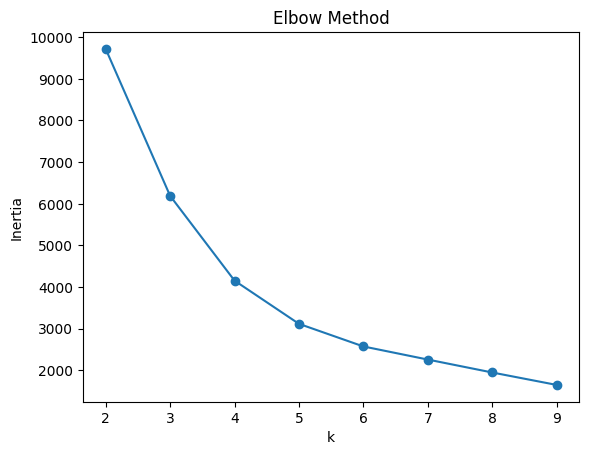

In [389]:
cluster_features = df[[
    'tenure', 'MonthlyCharges', 'TotalCharges'
]].fillna(0)
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(cluster_features)
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow Method')
plt.show()

In [391]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['ClusterGroup'] = kmeans.fit_predict(scaled)
df['ClusterGroup'] = df['ClusterGroup'].astype('category')

In [415]:
def calculate_churn_risk_score(row):
    score = 0
    if row['tenure'] <= 6:
        score += 3
    elif row['tenure'] <= 12:
        score += 2

    if row['MonthlyCharges'] >= 90:
        score += 3
    elif row['MonthlyCharges'] >= 70:
        score += 2
    elif row['MonthlyCharges'] >= 50:
        score += 1

    if row['Contract'] == 'Month-to-month':
        score += 4
    elif row['Contract'] == 'One year':
        score += 1

    if row['PaymentMethod'] == 'Electronic check':
        score += 3
    elif row['PaymentMethod'] in ['Mailed check', 'Bank transfer (automatic)']:
        score += 1

    if row['PaperlessBilling'] == 'Yes':
        score += 1

    if row['InternetService'] == 'DSL':
        score += 1
    elif row['InternetService'] == 'Fiber optic':
        score += 2

    if row['MultipleLines'] == 'Yes':
        score -= 1 
        
    if row.get('SeniorCitizen', 0) == 1:
        score += 1

    return score

In [417]:
df['ChurnRiskScore'] = df.apply(calculate_churn_risk_score, axis=1)
df['ChurnRiskLevel'] = pd.cut(df['ChurnRiskScore'],
                              bins=[-1, 4, 7, 10, float('inf')],
                              labels=['Low', 'Medium', 'High', 'Extreme'])
df['ChurnRiskLevel'] = df['ChurnRiskLevel'].astype('category')

In [505]:
df['ChurnRiskScoreBin'] = pd.cut(df['ChurnRiskScore'], bins=[-1, 4, 7, 10, float('inf')], labels=[0, 1, 2, 3])

In [623]:
y = df['Churn']
X = df.drop(columns=['Churn','TotalBin','TenureBin','HasBoth','ContractTenure','EarlyHighCost','MissingServicesCount',
                     'ClusterGroup','ChurnRiskLevel','ChurnRiskScore','Partner'],axis=1)

In [687]:
## converting all into categorytypes so then i can directly pass into lgbm without any encoding nd it can handle it

In [625]:
for col in ['TenureGroup', 'StreamingBundle', 'NoSupportInternet']:
    X[col] = X[col].astype(str).astype('category') 

In [627]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [629]:
cat_features = X.select_dtypes(include=['category']).columns.tolist()
cat_indices = [X.columns.get_loc(col) for col in cat_features]

In [689]:
## Use differnt techniques but it is helpful and also very compatible with LGBM

In [631]:
smote_nc = SMOTENC(categorical_features=cat_indices, random_state=42)
X_res, y_res = smote_nc.fit_resample(X_train, y_train)

In [691]:
## Fitted with tuned params 

In [633]:
# params = {'max_depth': 4, 'num_leaves': 134, 'learning_rate': 0.001908358692307134, 'n_estimators': 683, 'min_child_samples': 69, 
#     'subsample': 0.8557525946381974, 'colsample_bytree': 0.9631302454567003, 'reg_alpha': 5.1425850439054954e-08, 'reg_lambda': 3.9158530233564234e-06}
params = {'boosting_type': 'dart', 'max_depth': 14, 'num_leaves': 146, 'learning_rate': 0.00023848450748005623, 'n_estimators': 3605, 
          'min_child_samples': 15, 'min_split_gain': 0.3754975687617798, 'subsample': 0.7772743084618717, 'colsample_bytree': 0.5692567816672333, 
          'feature_fraction': 0.5779554459775076, 'bagging_fraction': 0.7758939203170859, 'bagging_freq': 4, 'reg_alpha': 92.9016035536145, 'reg_lambda': 0.00030656624313231206, 'scale_pos_weight': 1.0090165836181257}
model = LGBMClassifier(**params, objective='binary', random_state=42)

model.fit(
    X_res, y_res,
    eval_set=[(X_test, y_test)],
    eval_metric='auc',
    categorical_feature=X.select_dtypes('category').columns.tolist(),
)

LGBMClassifier(bagging_fraction=0.7758939203170859, bagging_freq=4,
               boosting_type='dart', colsample_bytree=0.5692567816672333,
               feature_fraction=0.5779554459775076,
               learning_rate=0.00023848450748005623, max_depth=14,
               min_child_samples=15, min_split_gain=0.3754975687617798,
               n_estimators=3605, num_leaves=146, objective='binary',
               random_state=42, reg_alpha=92.9016035536145,
               reg_lambda=0.00030656624313231206,
               scale_pos_weight=1.0090165836181257,
               subsample=0.7772743084618717)

In [693]:
## Decent performance

In [681]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC
roc_score = roc_auc_score(y_test, y_proba)
print(f"\nROC AUC Score: {roc_score:.4f}")

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1035
           1       0.53      0.76      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409

Confusion Matrix:
[[782 253]
 [ 89 285]]

ROC AUC Score: 0.8312


In [695]:
## Overall good score

In [679]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_proba)

0.5982155740995814

In [697]:
## Still better but not very good

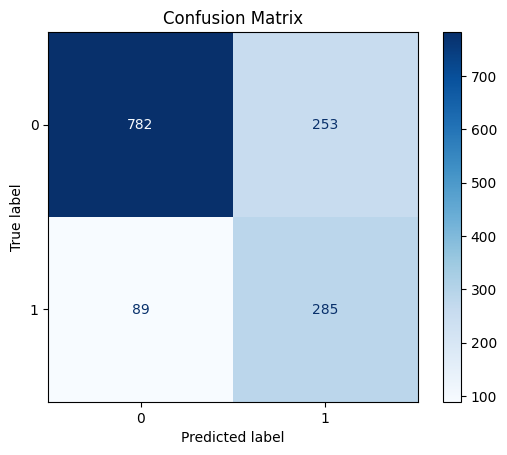

In [637]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [699]:
## It is also better 

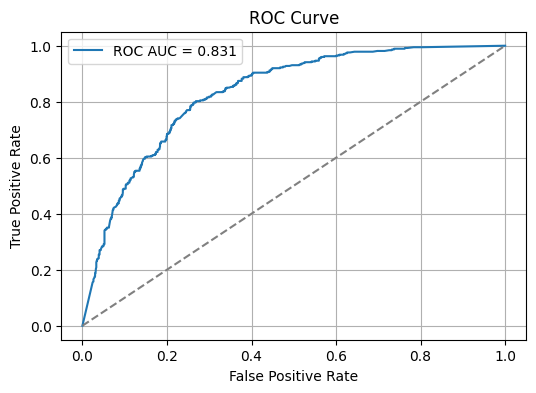

In [639]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [701]:
## One of created feature has very high importance

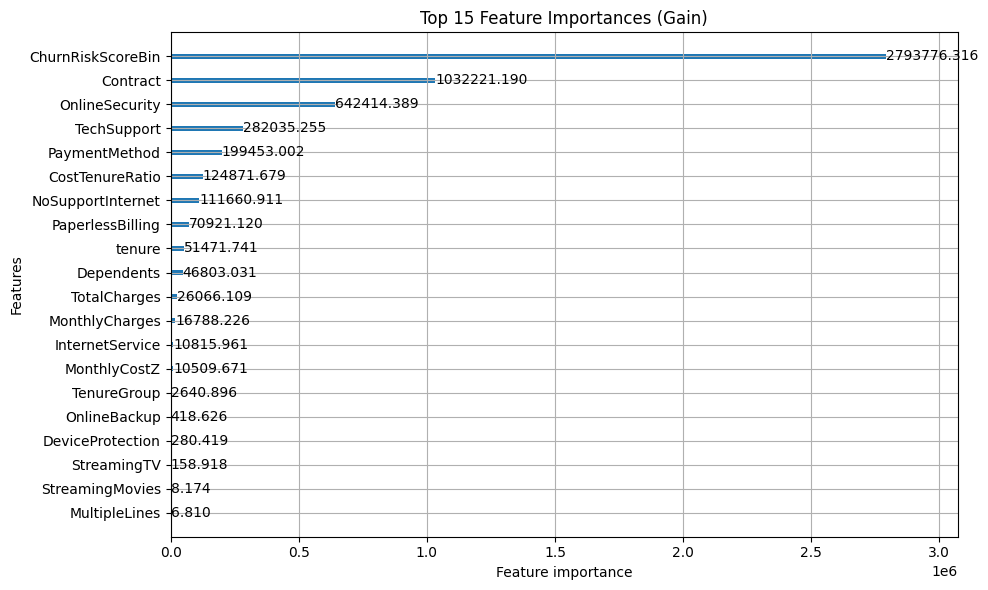

In [641]:
import lightgbm as lgb

lgb.plot_importance(model, max_num_features=25, importance_type='gain', figsize=(10, 6))
plt.title("Top 15 Feature Importances (Gain)")
plt.tight_layout()
plt.show()

In [705]:
## Decent f1

In [703]:
print(f1_score(y_test,y_pred))

0.625


<Axes: >

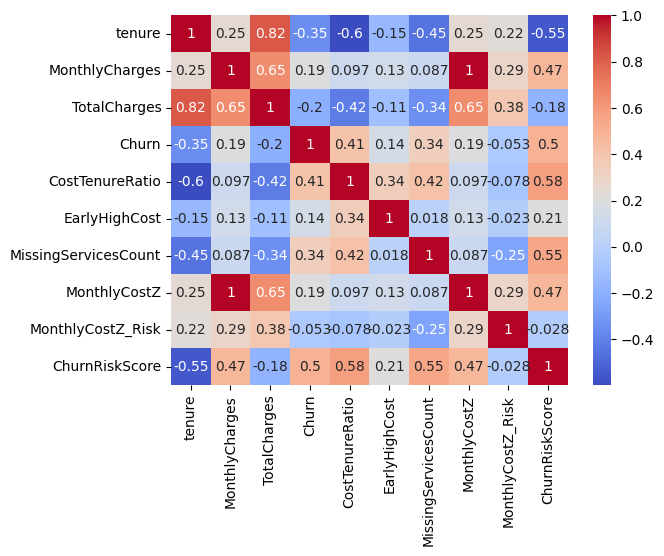

In [645]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [707]:
## Optuna for tuning

In [665]:
import optuna
from sklearn.metrics import f1_score, recall_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTENC
def objective(trial):
    param = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),  # Try dropout boosting too!
    'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 4.0),
    'max_depth': trial.suggest_int('max_depth', 3, 15),
    'num_leaves': trial.suggest_int('num_leaves', 20, 300),
    'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.3, log=True),
    'n_estimators': trial.suggest_int('n_estimators', 500, 4000),  # longer training
    
    'min_child_samples': trial.suggest_int('min_child_samples', 3, 100),
    'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 1.0),  # for regularization
    
    'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    
    'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),  # Added!
    'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),  # Alias for subsample (used with bagging_freq)
    'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),              # Dropout frequency
    
    'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 100.0, log=True),
    'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 100.0, log=True),
    

    'class_weight': 'balanced',  # Already good
    'random_state': 42,
}
    smote_nc = SMOTENC(categorical_features=cat_indices, random_state=42)
    X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)
    model = lgb.LGBMClassifier(**param)
    model.fit(
        X_train_res, y_train_res,
        eval_set=[(X_test, y_test)],
        eval_metric='auc',
    )

    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds, pos_label=1)
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, timeout=3600)  # 1 hour limit or 100 trials

print("Best Trial:")
print(study.best_trial.params)

[I 2025-05-17 07:23:18,040] A new study created in memory with name: no-name-a399257f-868f-4c13-8b73-03e81b5a48e0
C:\Users\HOME\anaconda3\Lib\site-packages\optuna\trial\_trial.py:678: RuntimeWarning: Inconsistent parameter values for distribution with name "scale_pos_weight"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 1.0, 'high': 4.0, 'log': False}
  warnings.warn(
[I 2025-05-17 07:23:23,346] Trial 0 finished with value: 0.5644768856447688 and parameters: {'boosting_type': 'gbdt', 'scale_pos_weight': 2.1480850134919716, 'max_depth': 11, 'num_leaves': 148, 'learning_rate': 0.1990545539202284, 'n_estimators': 1214, 'min_child_samples': 84, 'min_split_gain': 0.2441143570788057, 'subsample': 0.8294933456066973, 'colsample_bytree': 0.6790543401847031

KeyboardInterrupt: 

In [621]:
study.best_value

0.6263736263736264

In [709]:
## PR Curve to find out best threshold

from sklearn.metrics import precision_recall_curve

probs = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.title('Precision-Recall vs Threshold')
plt.show()

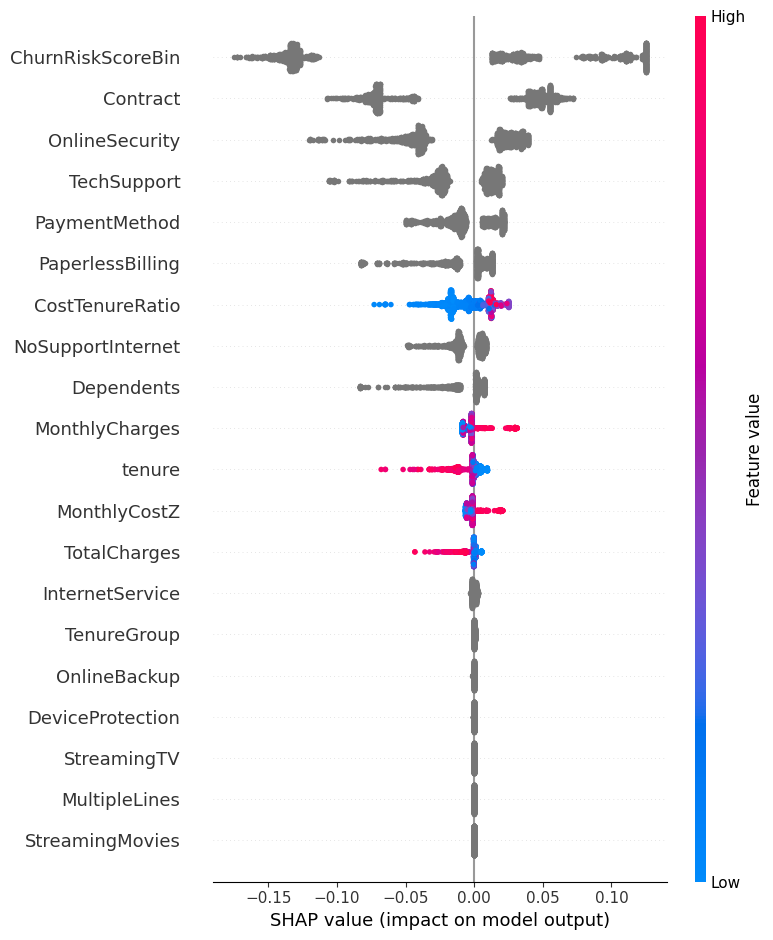

In [713]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

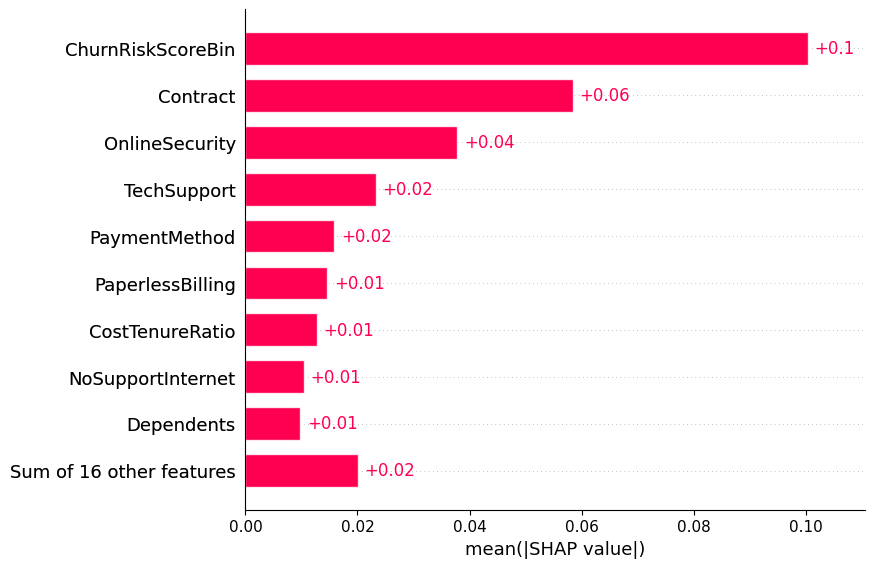

In [715]:
shap.plots.bar(shap_values)